# Explore Zillow Clustering Exercises
### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
import pandas as pd
import numpy as np
import os

import env
import acquire
import wrangle_zillow

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import explore_zillow

In [3]:
df = acquire.get_zillow_data()

In [4]:
df = wrangle_zillow.clean_zillow(df)
df.shape

(71583, 14)

In [5]:
df = wrangle_zillow.prepare_zillow(df)

In [6]:
df.head(1).T

parcelid,14297519
bathroomcnt,3.5
bedroomcnt,4
calculatedfinishedsquarefeet,3100
latitude,33.6349
longitude,-117.869
rawcensustractandblock,6.05906e+07
yearbuilt,1998
structuretaxvaluedollarcnt,485713
taxvaluedollarcnt,1.02328e+06
landtaxvaluedollarcnt,537569


In [7]:
dummy_df = pd.get_dummies(df['county'], drop_first = True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(columns={'county'})

In [8]:
train, validate, test = explore_zillow.train_validate_test_split(df, target='logerror_class', seed=123)

In [10]:
train.shape, validate.shape, test.shape

((40086, 16), (17180, 16), (14317, 16))

In [11]:
object_cols = explore_zillow.get_object_cols(train)
object_cols


[]

In [12]:
numeric_cols = explore_zillow.get_numeric_cols(train, explore_zillow.get_object_cols(train))
numeric_cols

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'id.1',
 'logerror',
 'logerror_class',
 'Orange',
 'Ventura']

In [13]:
binary_vars = ['Orange', 'Ventura']
quant_vars = ['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror']
categorical_target = 'logerror_class'
continuous_target = 'logerror'

### Univariate Exploration

#### 1. univariate explorate
#### - What are the distributions of each variable? 


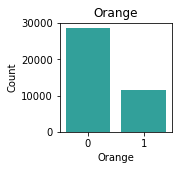

   Orange  Count  Percent
0       0  28638    71.44
1       1  11448    28.56
_________________________________________________________________


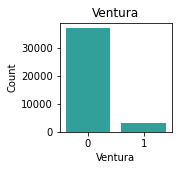

   Ventura  Count  Percent
0        0  36909    92.07
1        1   3177     7.93
_________________________________________________________________


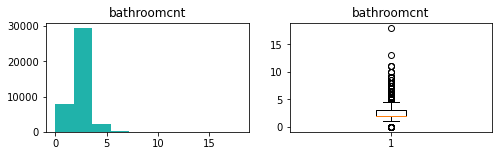

count    40086.000000
mean         2.267076
std          0.952681
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: bathroomcnt, dtype: float64


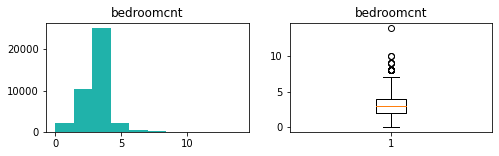

count    40086.000000
mean         3.006910
std          1.024937
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: bedroomcnt, dtype: float64


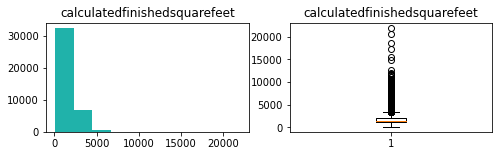

count    40086.000000
mean      1750.235718
std        942.740439
min        128.000000
25%       1164.000000
50%       1508.000000
75%       2062.750000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64


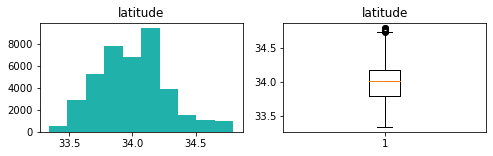

count    40086.000000
mean        34.003178
std          0.269997
min         33.340620
25%         33.801589
50%         34.013381
75%         34.175044
max         34.796863
Name: latitude, dtype: float64


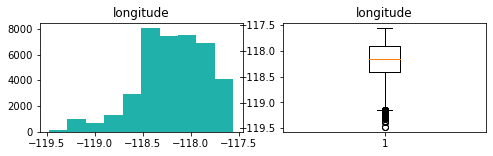

count    40086.000000
mean      -118.192506
std          0.360516
min       -119.475416
25%       -118.410000
50%       -118.163704
75%       -117.913274
max       -117.554636
Name: longitude, dtype: float64


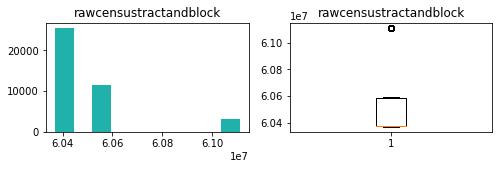

count    4.008600e+04
mean     6.049450e+07
std      2.044978e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


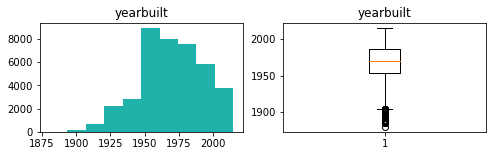

count    40086.000000
mean      1969.336377
std         23.226943
min       1880.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64


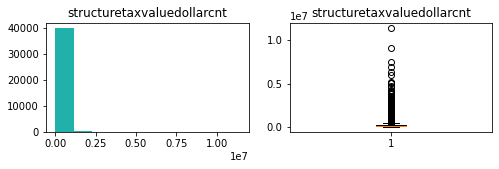

count    4.008600e+04
mean     1.878667e+05
std      2.337218e+05
min      4.400000e+01
25%      8.284125e+04
50%      1.348850e+05
75%      2.164510e+05
max      1.142179e+07
Name: structuretaxvaluedollarcnt, dtype: float64


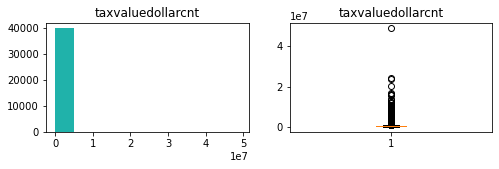

count    4.008600e+04
mean     4.869444e+05
std      6.738280e+05
min      3.254000e+03
25%      2.030490e+05
50%      3.553370e+05
75%      5.650000e+05
max      4.906124e+07
Name: taxvaluedollarcnt, dtype: float64


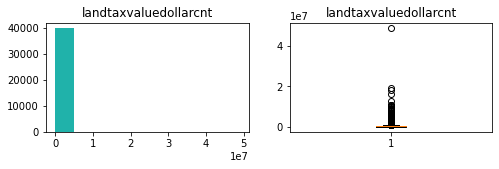

count    4.008600e+04
mean     2.990777e+05
std      5.136614e+05
min      1.196000e+03
25%      8.281600e+04
50%      2.022640e+05
75%      3.664778e+05
max      4.895220e+07
Name: landtaxvaluedollarcnt, dtype: float64


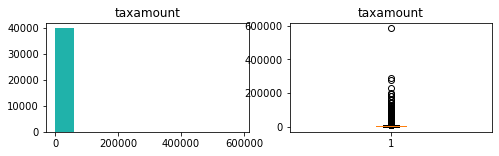

count     40086.000000
mean       5938.547221
std        7847.872711
min          19.920000
25%        2670.250000
50%        4399.445000
75%        6832.022500
max      586639.300000
Name: taxamount, dtype: float64


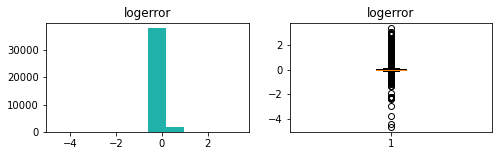

count    40086.000000
mean         0.017010
std          0.169473
min         -4.655420
25%         -0.023537
50%          0.006662
75%          0.038372
max          3.394544
Name: logerror, dtype: float64


In [14]:
explore_zillow.explore_univariate(train, binary_vars, quant_vars)

### Bivariate Exploration

#### - Does logerror score vary across fips?
#### - Is there a relationship between logerror and bedroom count?
#### - Is there a relationship between logerror and bathroom count?

Orange 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=160473580.0, pvalue=0.0009773784982129482)
         chi2       p-value  degrees of freedom
0  240.609797  7.024848e-52                   3

observed:
 logerror_class     q1     q2     q3     q4    All
Orange                                           
0                7627   6733   6926   7352  28638
1                2395   3289   3095   2669  11448
All             10022  10022  10021  10021  40086

expected:
              0            1            2            3
0  7159.857207  7159.857207  7159.142793  7159.142793
1  2862.142793  2862.142793  2861.857207  2861.857207


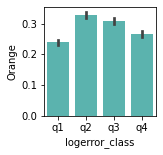


_____________________

Ventura 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=57344861.0, pvalue=0.04004644877989043)
        chi2   p-value  degrees of freedom
0  28.488791  0.000003                   3

observed:
 logerror_class     q1     q2     q3     q4    All
Ventura                                          
0                9335   9134   9205   9235  36909
1                 687    888    816    786   3177
All             10022  10022  10021  10021  40086

expected:
              0            1            2            3
0  9227.710373  9227.710373  9226.789627  9226.789627
1   794.289627   794.289627   794.210373   794.210373


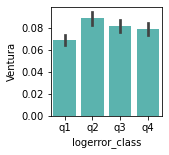


_____________________

bathroomcnt 
____________________



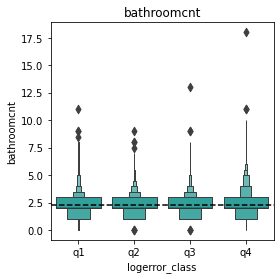

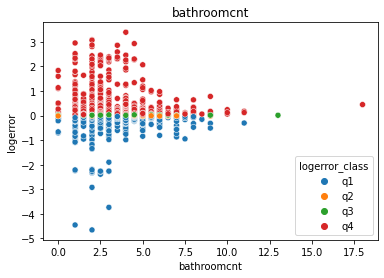

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean                2.170824      2.244911      2.291338      2.361241
std                 0.950688      0.838204      0.881258      1.108365
min                 0.000000      0.000000      0.000000      0.000000
25%                 2.000000      2.000000      2.000000      2.000000
50%                 2.000000      2.000000      2.000000      2.000000
75%                 3.000000      3.000000      3.000000      3.000000
max                11.000000      9.000000     13.000000     18.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06250523756011019, pvalue=5.3580422141329e-36)

____________________

bedroomcnt 
____________________



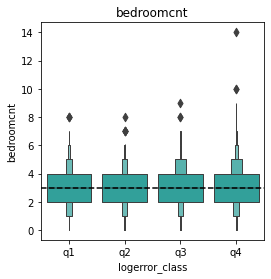

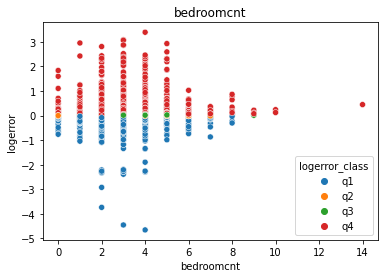

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean                2.928358      2.989523      3.026444      3.083325
std                 0.990553      0.982529      1.010819      1.105124
min                 0.000000      0.000000      0.000000      0.000000
25%                 2.000000      2.000000      2.000000      2.000000
50%                 3.000000      3.000000      3.000000      3.000000
75%                 4.000000      4.000000      4.000000      4.000000
max                 8.000000      8.000000      9.000000     14.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.05023694168092605, pvalue=7.951153988217582e-24)

____________________

calculatedfinishedsquarefeet 
____________________



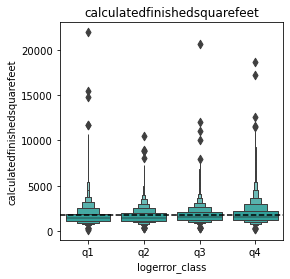

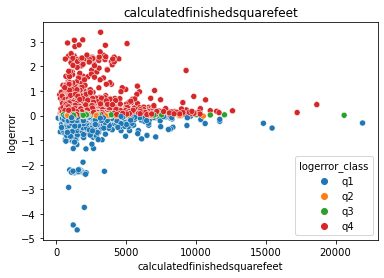

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean             1683.154560   1684.603273   1737.051691   1896.146592
std               942.891128    782.412412    849.670934   1141.009664
min               128.000000    368.000000    304.000000    242.000000
25%              1122.000000   1162.000000   1183.000000   1197.000000
50%              1442.500000   1492.500000   1536.000000   1580.000000
75%              1944.000000   2010.000000   2064.000000   2262.000000
max             21929.000000  10525.000000  20612.000000  18654.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07330933547993616, pvalue=6.743922506775992e-49)

____________________

latitude 
____________________



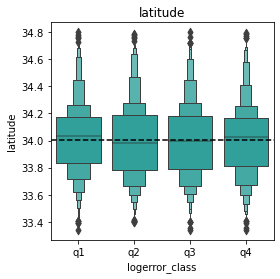

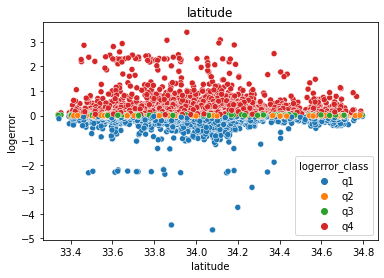

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean               34.018521     33.997118     33.996876     34.000198
std                 0.258464      0.283434      0.274796      0.261998
min                33.344289     33.399500     33.340620     33.341224
25%                33.833810     33.783608     33.788342     33.809600
50%                34.035157     33.979600     33.994100     34.027776
75%                34.172429     34.184754     34.177926     34.166870
max                34.796863     34.785097     34.795811     34.788737 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.018402349187358228, pvalue=0.00022904292631685953)

____________________

longitude 
____________________



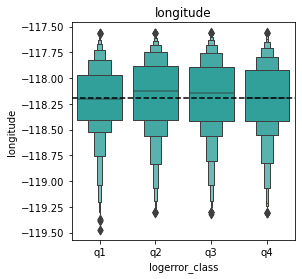

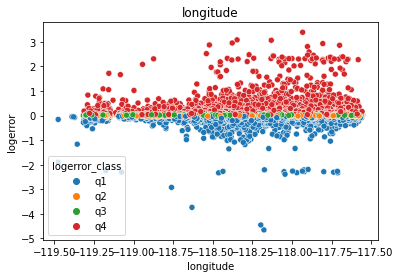

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean             -118.213667   -118.171252   -118.178311   -118.206795
std                 0.337080      0.373823      0.369117      0.359176
min              -119.475416   -119.310447   -119.316449   -119.312167
25%              -118.406906   -118.403922   -118.411803   -118.417008
50%              -118.199074   -118.123967   -118.143215   -118.189106
75%              -117.967447   -117.882165   -117.888213   -117.924486
max              -117.559828   -117.559641   -117.554636   -117.555373 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.009422497944336057, pvalue=0.05922661434137805)

____________________

rawcensustractandblock 
____________________



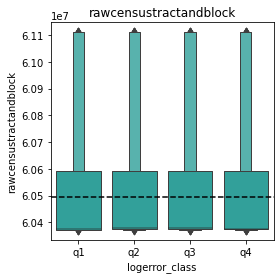

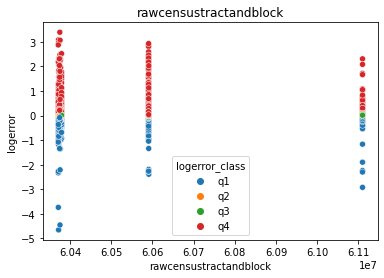

logerror_class            q1            q2            q3            q4
count           1.002200e+04  1.002200e+04  1.002100e+04  1.002100e+04
mean            6.047644e+07  6.051071e+07  6.050119e+07  6.048963e+07
std             1.945860e+05  2.114584e+05  2.059871e+05  2.040184e+05
min             6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%             6.037274e+07  6.037406e+07  6.037403e+07  6.037298e+07
50%             6.037571e+07  6.037901e+07  6.037701e+07  6.037601e+07
75%             6.059032e+07  6.059053e+07  6.059052e+07  6.059042e+07
max             6.111009e+07  6.111009e+07  6.111009e+07  6.111009e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.016116084637510728, pvalue=0.0012518776300331465)

____________________

yearbuilt 
____________________



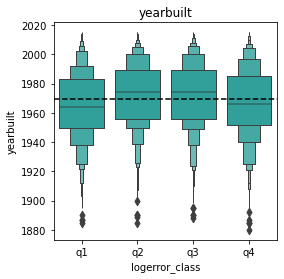

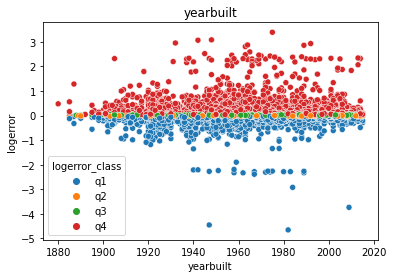

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean             1964.903512   1972.923867   1972.468217   1967.049995
std                23.606861     21.911455     22.418914     23.886429
min              1885.000000   1885.000000   1888.000000   1880.000000
25%              1950.000000   1956.000000   1956.000000   1952.000000
50%              1964.000000   1974.000000   1974.000000   1966.000000
75%              1983.000000   1989.000000   1989.000000   1985.000000
max              2015.000000   2015.000000   2015.000000   2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.032395124803226365, pvalue=8.728015400684477e-11)

____________________

structuretaxvaluedollarcnt 
____________________



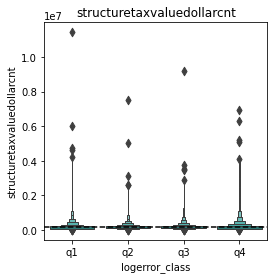

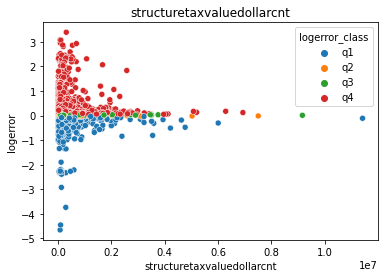

logerror_class            q1            q2            q3            q4
count           1.002200e+04  1.002200e+04  1.002100e+04  1.002100e+04
mean            1.811961e+05  1.768380e+05  1.859200e+05  2.075143e+05
std             2.557991e+05  1.773356e+05  2.035471e+05  2.822278e+05
min             4.400000e+01  1.810000e+02  1.015000e+03  1.320000e+02
25%             7.700000e+04  8.811925e+04  8.849200e+04  7.839200e+04
50%             1.259305e+05  1.386580e+05  1.413000e+05  1.335000e+05
75%             2.039580e+05  2.131050e+05  2.207150e+05  2.308760e+05
max             1.142179e+07  7.507773e+06  9.164901e+06  6.932495e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02977293916155007, pvalue=2.489842223446245e-09)

____________________

taxvaluedollarcnt 
____________________



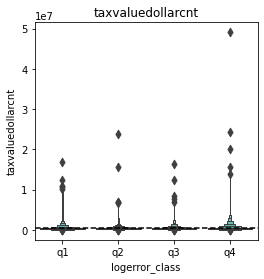

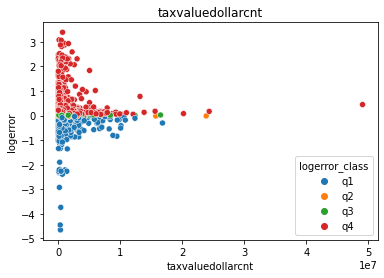

logerror_class            q1            q2            q3            q4
count           1.002200e+04  1.002200e+04  1.002100e+04  1.002100e+04
mean            4.832586e+05  4.467251e+05  4.656173e+05  5.521810e+05
std             6.591405e+05  4.835054e+05  4.948271e+05  9.470462e+05
min             1.319800e+04  1.961600e+04  1.457700e+04  3.254000e+03
25%             1.864110e+05  2.220005e+05  2.210900e+05  1.851070e+05
50%             3.360395e+05  3.655295e+05  3.676130e+05  3.490000e+05
75%             5.460000e+05  5.477950e+05  5.634630e+05  6.160000e+05
max             1.681467e+07  2.385837e+07  1.649781e+07  4.906124e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0195023550754508, pvalue=9.425993141653097e-05)

____________________

landtaxvaluedollarcnt 
____________________



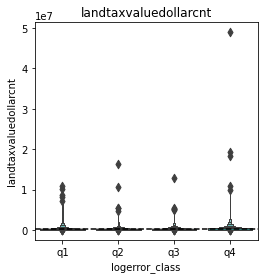

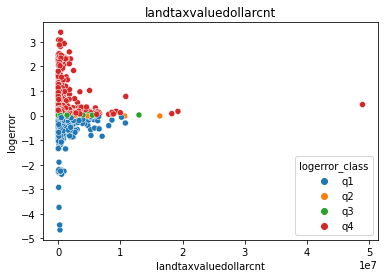

logerror_class            q1            q2            q3            q4
count           1.002200e+04  1.002200e+04  1.002100e+04  1.002100e+04
mean            3.020625e+05  2.698870e+05  2.796972e+05  3.446667e+05
std             4.720804e+05  3.434224e+05  3.467385e+05  7.688615e+05
min             1.196000e+03  4.242000e+03  5.381000e+03  1.600000e+03
25%             7.382450e+04  9.407225e+04  9.295100e+04  7.187300e+04
50%             1.922645e+05  2.080420e+05  2.097120e+05  1.966040e+05
75%             3.614190e+05  3.544970e+05  3.604050e+05  3.963040e+05
max             1.080943e+07  1.635060e+07  1.299520e+07  4.895220e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.011242414165034097, pvalue=0.02439189771285542)

____________________

taxamount 
____________________



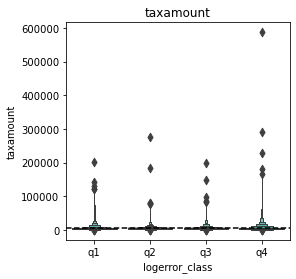

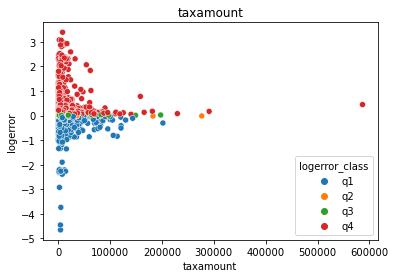

logerror_class             q1             q2             q3             q4
count            10022.000000   10022.000000   10021.000000   10021.000000
mean              5888.265728    5488.227035    5708.891285    6668.854791
std               7638.173001    5617.919279    5803.255773   11045.641529
min                 19.920000      51.260000      61.820000      49.180000
25%               2501.052500    2893.495000    2878.620000    2450.780000
50%               4170.495000    4516.115000    4544.910000    4318.370000
75%               6585.475000    6616.470000    6839.000000    7380.590000
max             201863.310000  276797.830000  197525.120000  586639.300000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017859093911577733, pvalue=0.0003491183719196499)

____________________

logerror 
____________________



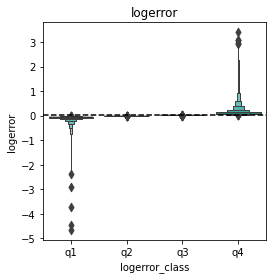

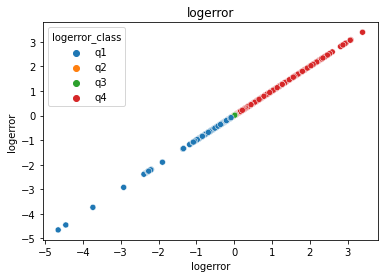

logerror_class            q1            q2            q3            q4
count           10022.000000  10022.000000  10021.000000  10021.000000
mean               -0.093913     -0.007128      0.020868      0.148228
std                 0.160587      0.008569      0.008996      0.242548
min                -4.655420     -0.023537      0.006669      0.038389
25%                -0.096662     -0.014356      0.013038      0.052665
50%                -0.054699     -0.006479      0.020274      0.077360
75%                -0.035866      0.000402      0.028334      0.142787
max                -0.023537      0.006666      0.038373      3.394544 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

____________________



In [15]:
explore_zillow.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

### Multivariate Exploration

#### - If we control for calculatedfinishedsqft, does logerror differ across tax amount?

#### - If we control for fullbathcnt, does logerror differ across yearbuilt?

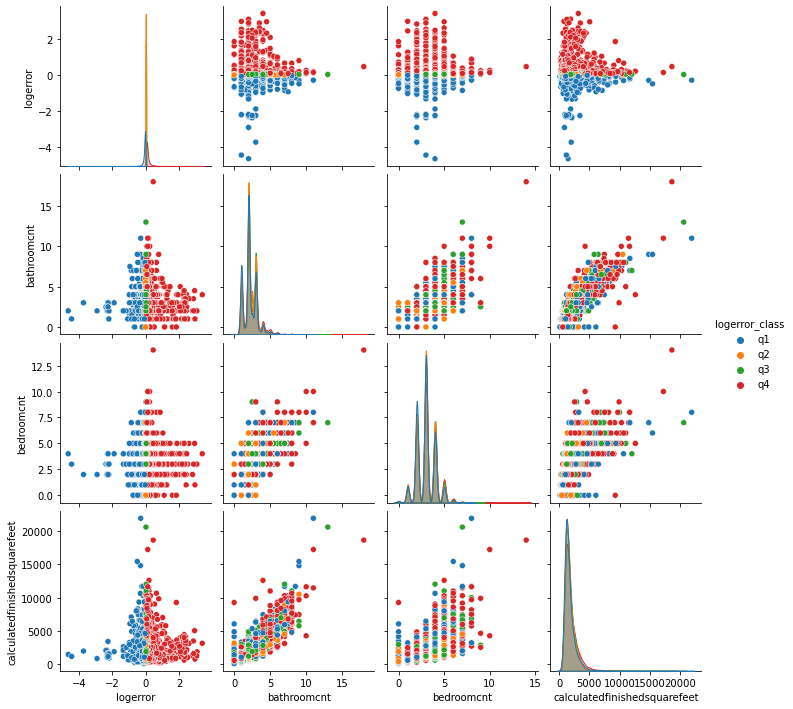

In [16]:
sns.pairplot(train[['logerror','logerror_class', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']], hue='logerror_class')

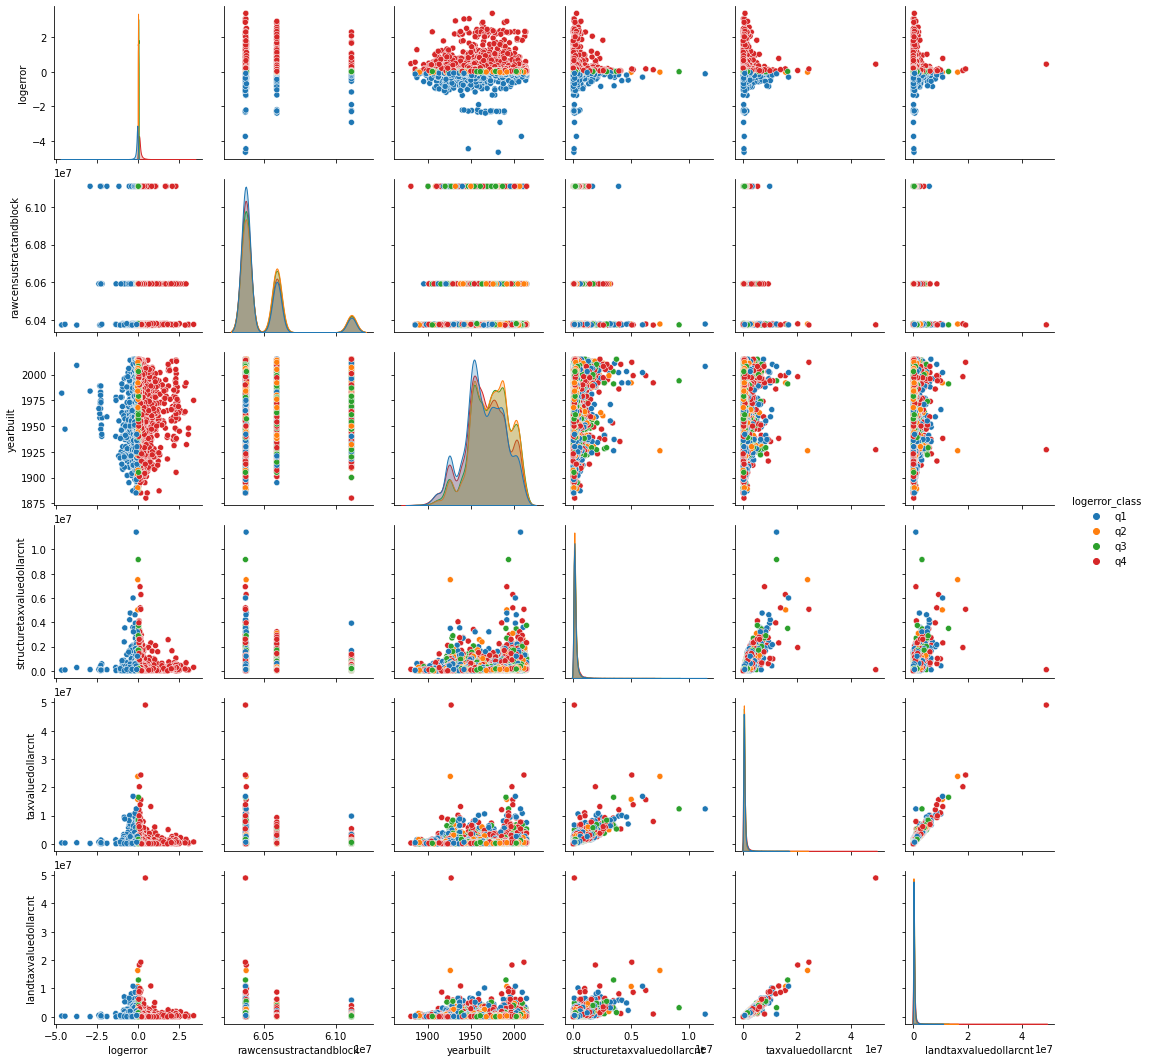

In [17]:
sns.pairplot(train[['logerror','logerror_class','rawcensustractandblock','yearbuilt','structuretaxvaluedollarcnt',
'taxvaluedollarcnt','landtaxvaluedollarcnt']], hue='logerror_class')

Properties built prior to about 1930 seem to have less variance in log error.

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

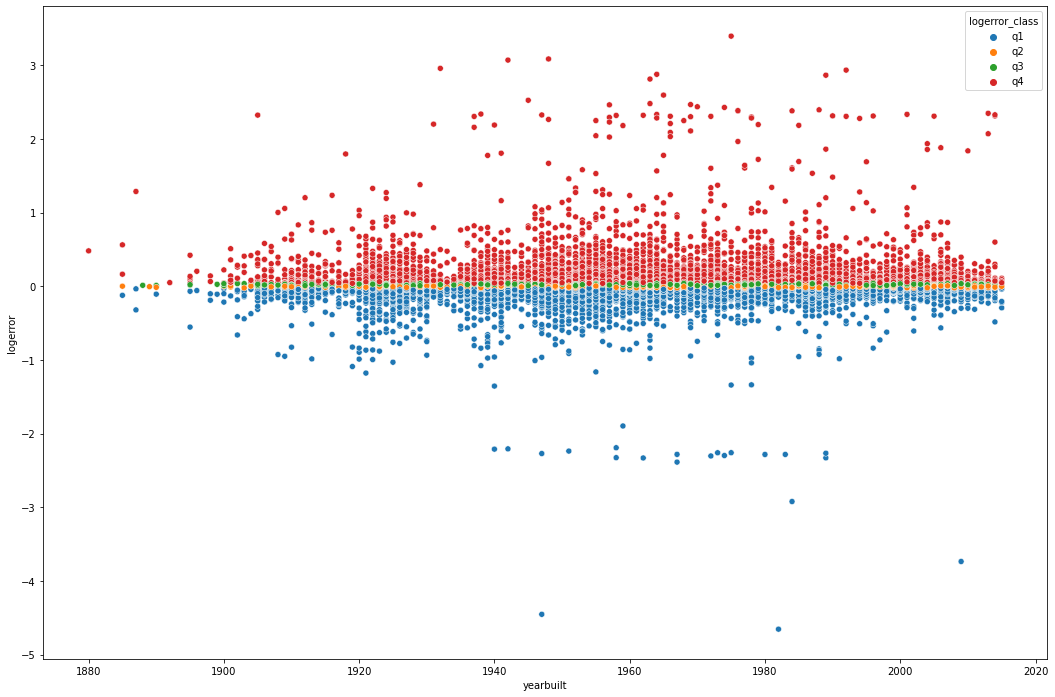

In [18]:
plt.figure(figsize=(18,12))
sns.scatterplot(x=train.yearbuilt, y=train.logerror, hue=train.logerror_class)